In [107]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog, orb
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Helper functions

In [108]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

### Loading the data

In [122]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

### Converting to numpy arrays

In [123]:
images = np.array(images)
labels = np.array(labels)

In [124]:
images.shape

(987, 10000)

### showing few random images from dataset

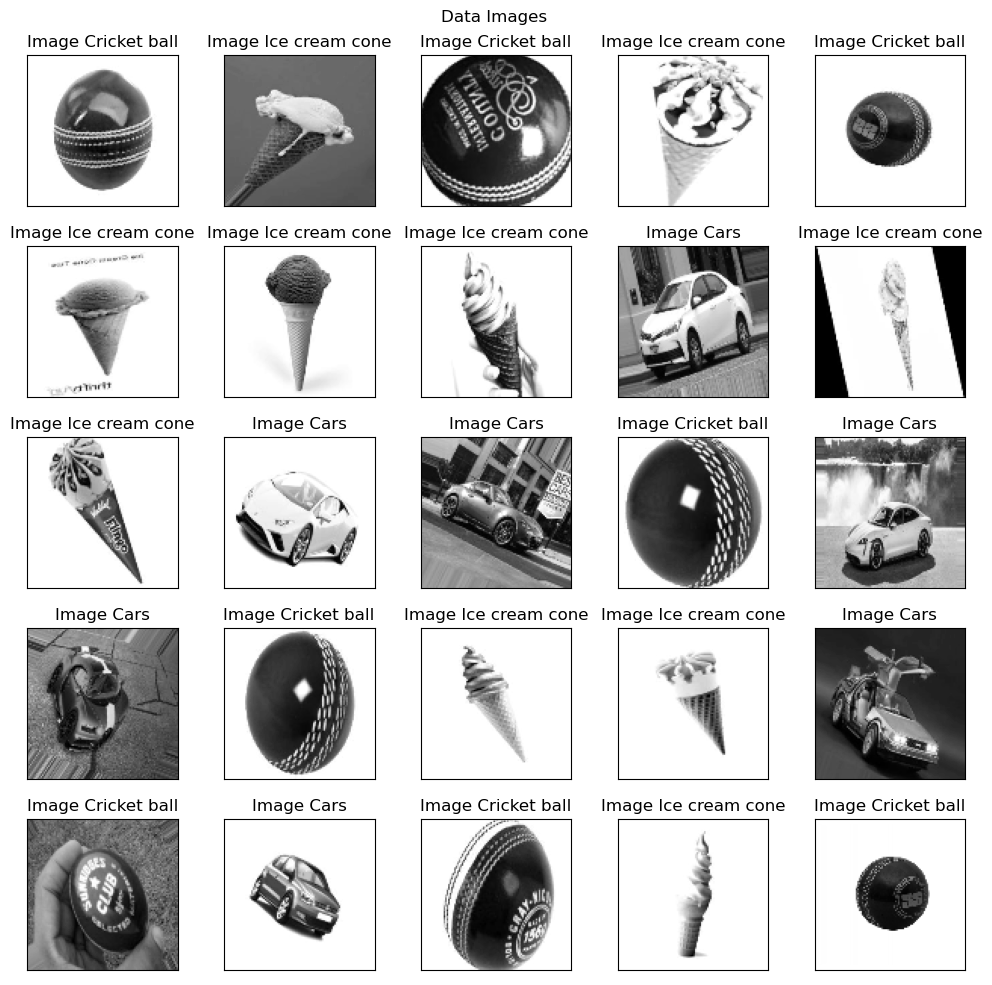

In [125]:
showGridImage(images,labels ,5, 'Data Images')

### splitting the dataset into train and test data
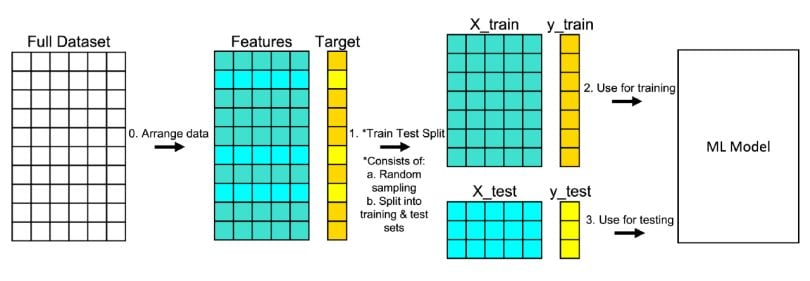

In [159]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=0)

### Fitting the ML Model (Logistic Regression)
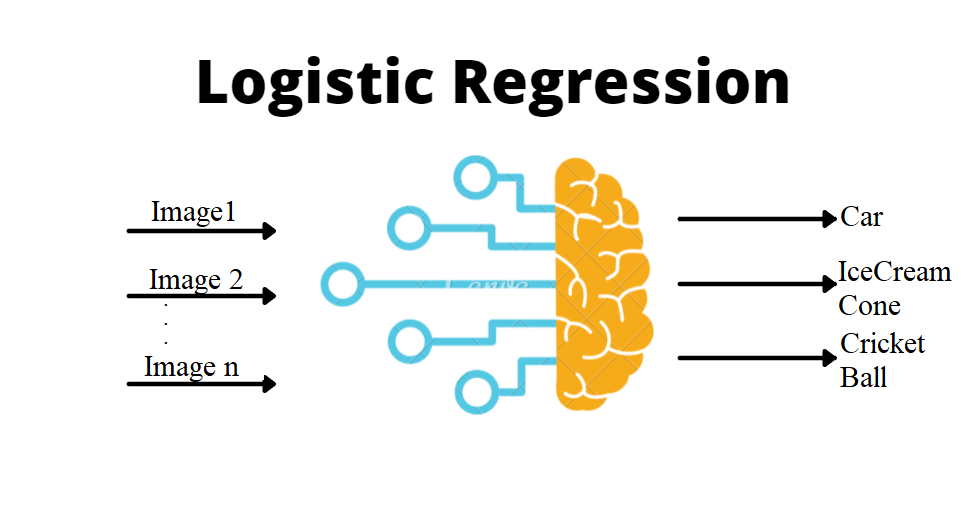

In [137]:
logisticReg = LogisticRegression()
logisticReg.fit(xTrain, yTrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction on Test Data

In [138]:
predsClasses = logisticReg.predict(xTest)

### Evaluating the model
    1. Train Accuracy
    2. Test Accuracy

In [139]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 79.80%


<AxesSubplot:>

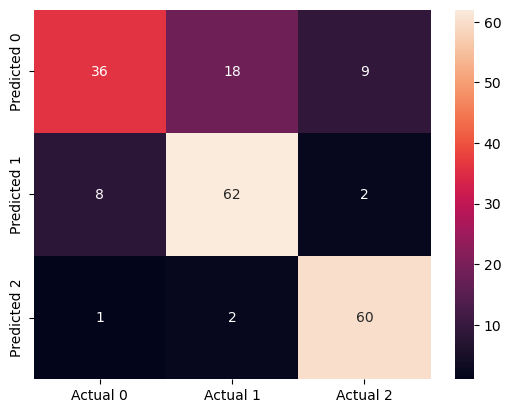

In [140]:
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmLogistic, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

### Showing images with model predicted Class 

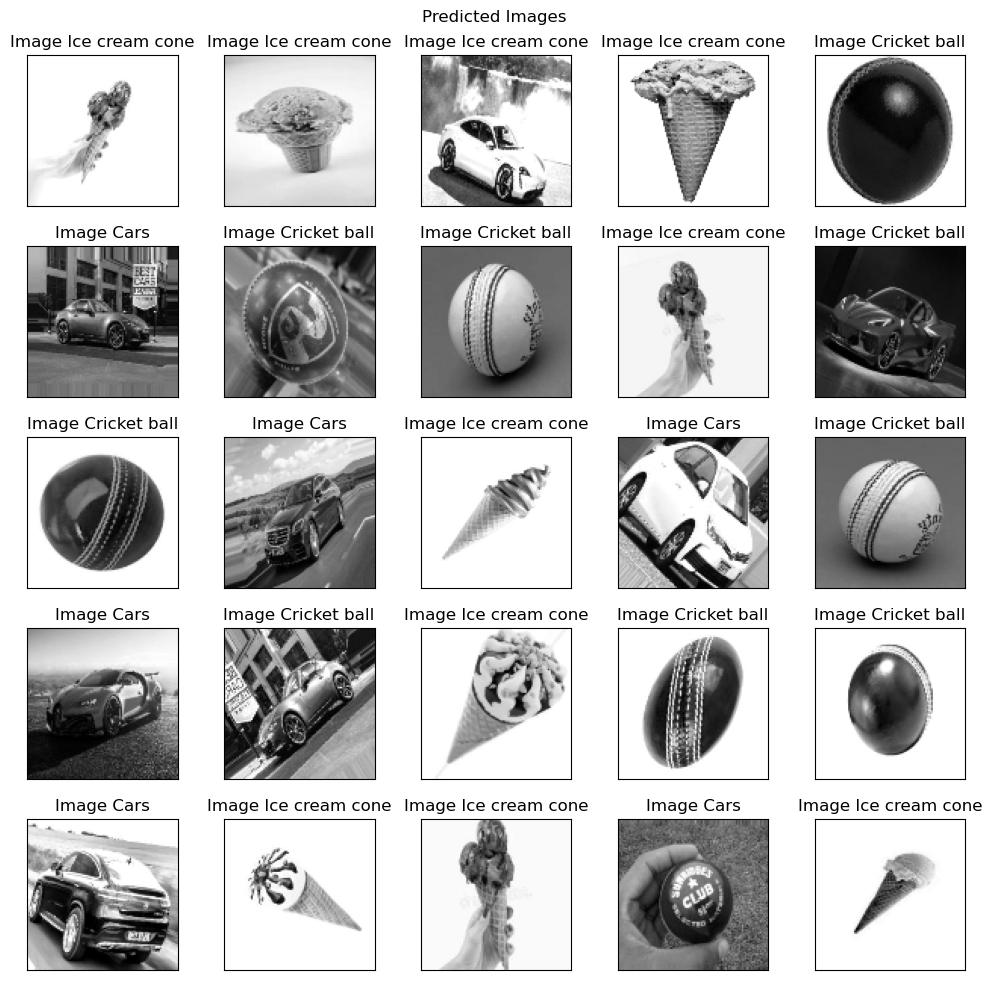

In [141]:
showGridImage(xTest, predsClasses, 5, 'Predicted Images')

### Using the hog feature discriptor for feature extraction

### Hog Features Discriptor
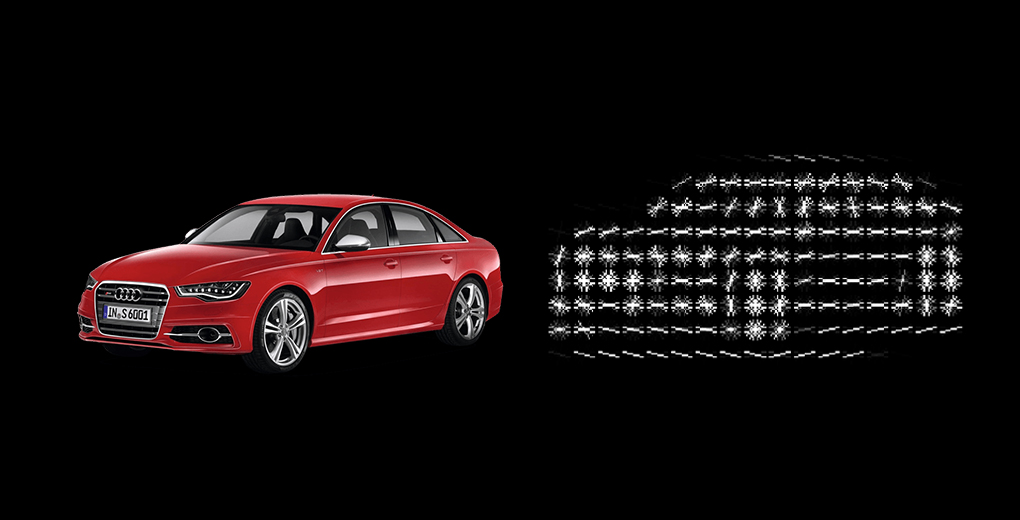
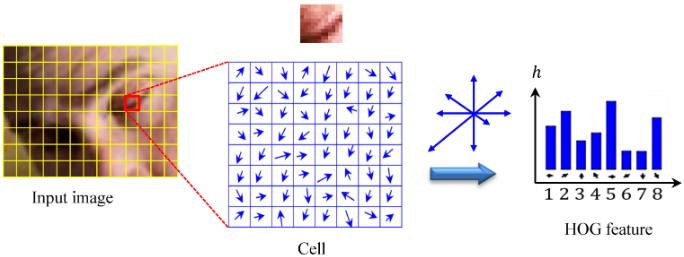

In [114]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(cls)
        labels.append(label)

In [115]:
hogFeatures = np.array(hogFeatures)
labels = np.array(labels)
hogImages = np.array(hogImages)

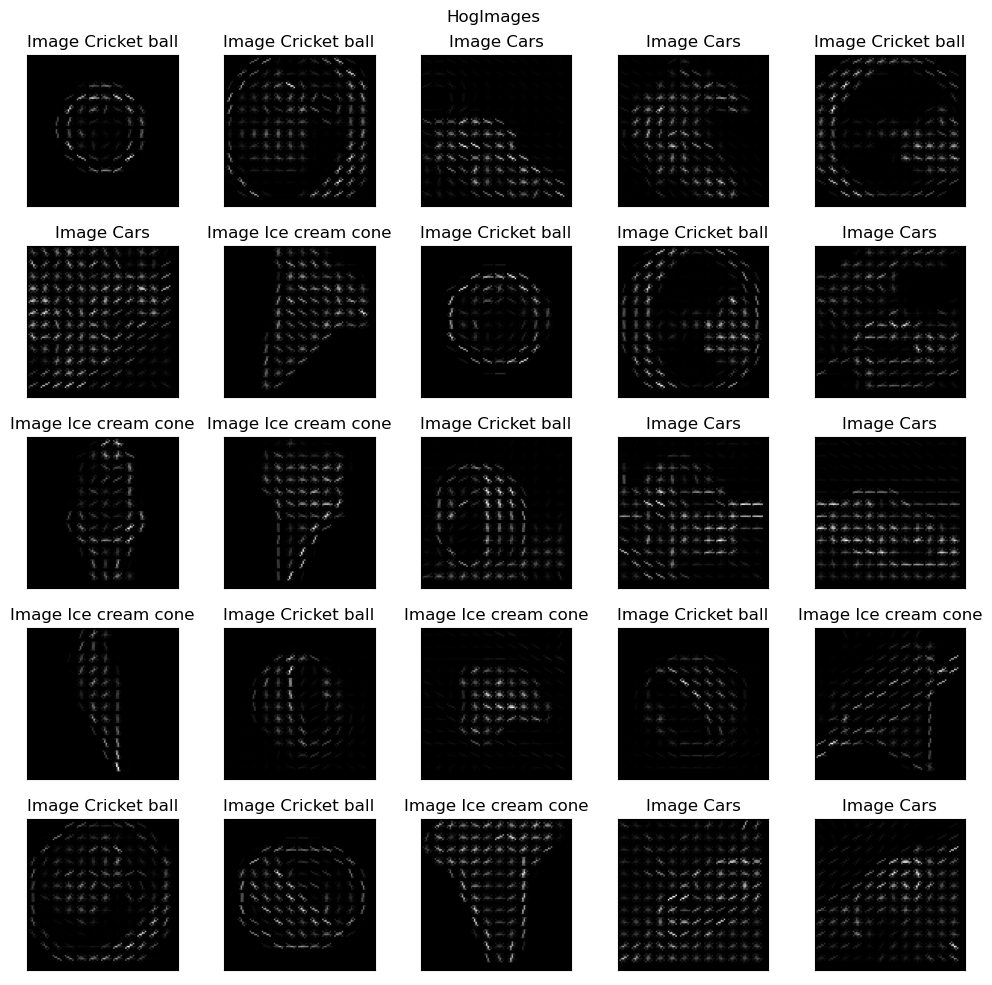

In [116]:
showGridImage(hogImages, labels, title='HogImages')

In [117]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, HogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)

In [118]:
logisticReg = LogisticRegression()
logisticReg.fit(xTrain, yTrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
predsClasses = logisticReg.predict(xTest)

In [120]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 96.97%


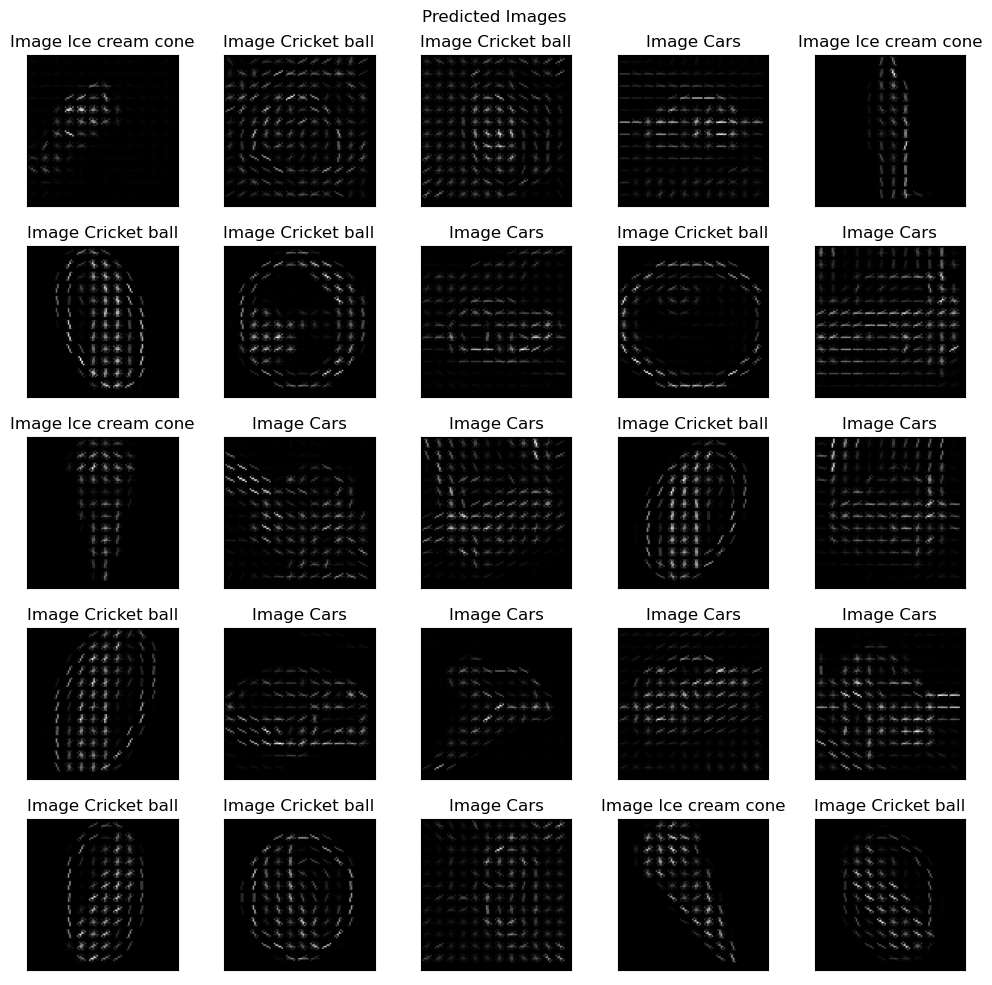

In [121]:
showGridImage(HogTestImages, predsClasses, 5,'Predicted Images')

<AxesSubplot:>

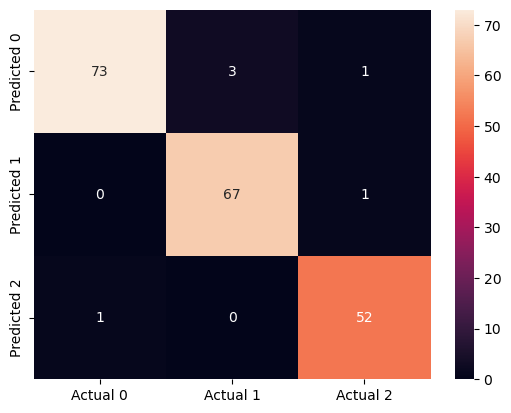

In [106]:
cm = confusion_matrix(yTest, predsClasses)
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cm, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

In [142]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image.flatten())
        label = classes.index(cls)
        labels.append(label)

In [143]:
images = np.array(images)
labels = np.array(labels)

In [144]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, test_size=0.2, random_state=42)

In [145]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [147]:
predsClasses = SVMClassifier.predict(xTest)

In [148]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 97.34%
Test Accuracy: 92.93%


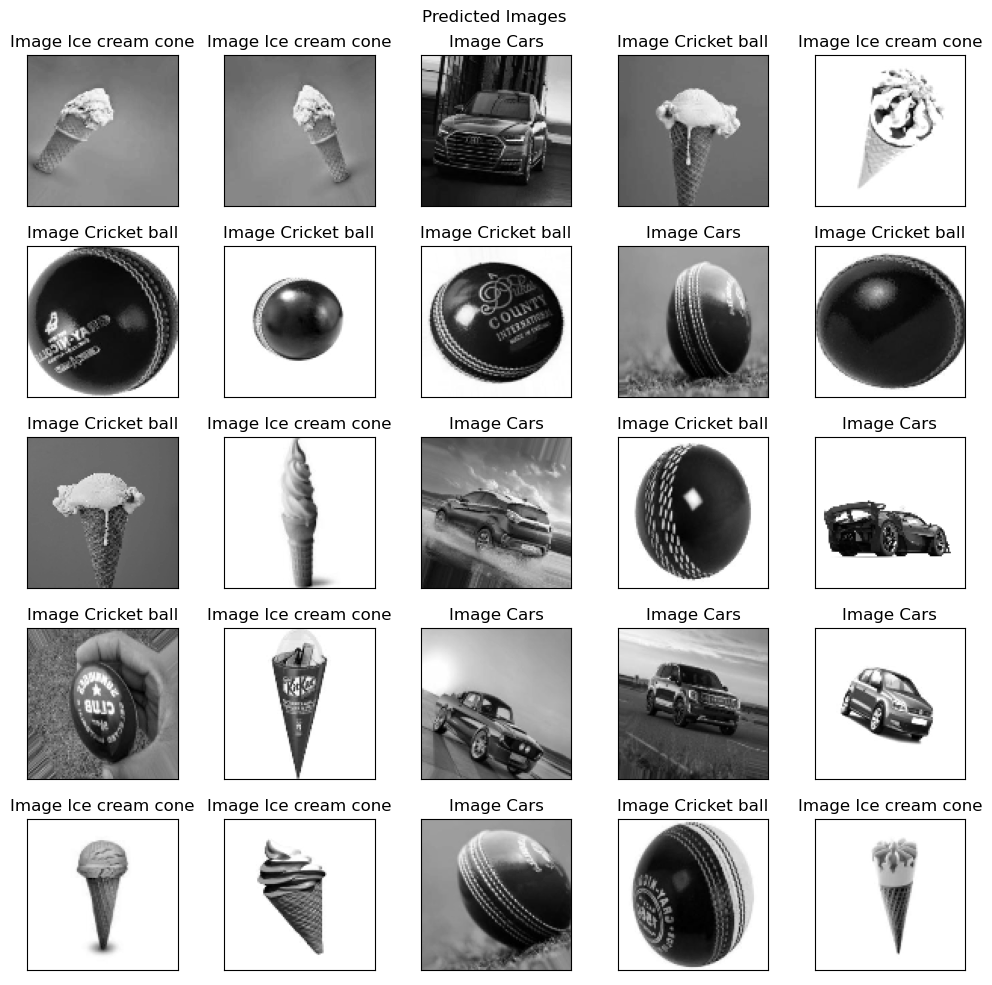

In [149]:
showGridImage(xTest, predsClasses, 5,'Predicted Images')

<AxesSubplot:>

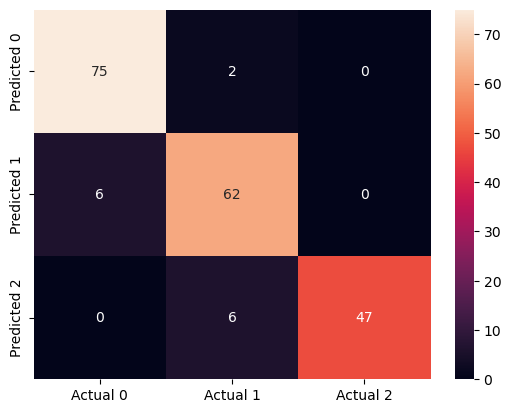

In [150]:
cm = confusion_matrix(yTest, predsClasses)
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cm, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

In [151]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(cls)
        labels.append(label)

In [152]:
images = np.array(images)
labels = np.array(labels)

In [153]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, HogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)

In [154]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [155]:
predsClasses = SVMClassifier.predict(xTest)

In [156]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 99.87%
Test Accuracy: 97.47%


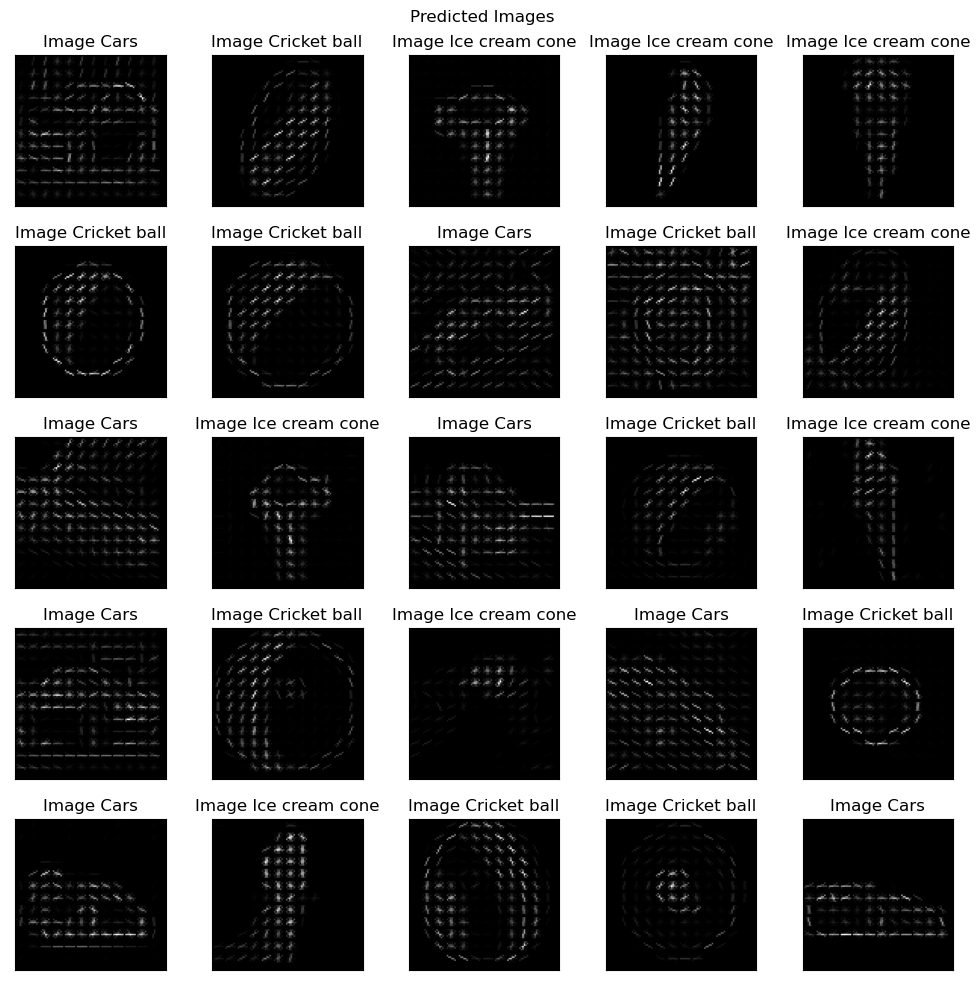

In [157]:
showGridImage(HogTestImages, predsClasses, 5,'Predicted Images')

<AxesSubplot:>

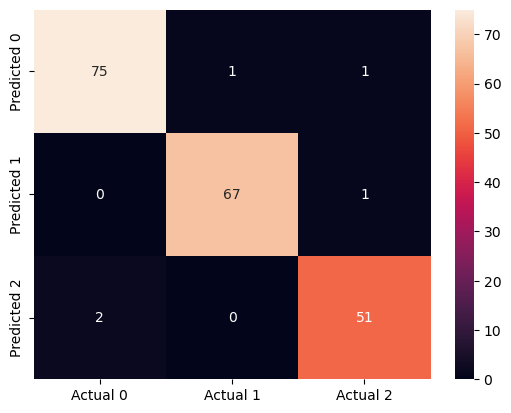

In [158]:
cm = confusion_matrix(yTest, predsClasses)
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cm, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])